# Structuring data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
from glob import glob

In [4]:
female_path = glob("./data/crop/female_crop/*.png")
male_path = female = glob("./data/crop/male_crop/*.png")

In [5]:
path = female_path + male_path

Gets size of image.

In [6]:
def get_size(path):
    img = Image.open(path)
    return img.size[0]

In [7]:
get_size(path[0])

122

Makes dataframe with pandas.

In [8]:
dataframe = pd.DataFrame(data= path, columns=["path"])
dataframe.head()
dataframe.shape

(6059, 1)

In [9]:
dataframe["size"] = dataframe["path"].apply(get_size)
dataframe.head()

,path,size
0,./data/crop/female_crop/female_6653.png,122
1,./data/crop/female_crop/female_3869.png,182
2,./data/crop/female_crop/female_396.png,182
3,./data/crop/female_crop/female_4276.png,122
4,./data/crop/female_crop/female_5498.png,273


# EDA

In [10]:
dataframe.describe()

,size
count,6059.000000
mean,154.230896
std,71.600016
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

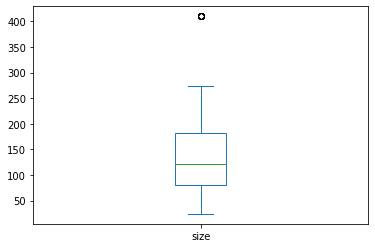

In [11]:
dataframe['size'].plot(kind = 'box')

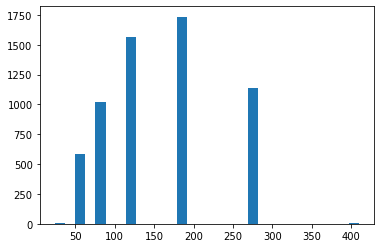

In [12]:
plt.hist(dataframe["size"], bins= 30)
plt.show()

Resize images to size 100 x 100 and remove the ones less than 54.

In [13]:
new_dataframe = dataframe[dataframe["size"] > 60]
new_dataframe

,path,size
0,./data/crop/female_crop/female_6653.png,122
1,./data/crop/female_crop/female_3869.png,182
2,./data/crop/female_crop/female_396.png,182
3,./data/crop/female_crop/female_4276.png,122
4,./data/crop/female_crop/female_5498.png,273
...,...,...
6054,./data/crop/male_crop/male_2372.png,122
6055,./data/crop/male_crop/male_6032.png,182
6056,./data/crop/male_crop/male_4869.png,182
6057,./data/crop/male_crop/male_4131.png,81


In [29]:
def get_gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

female    0.592672
male      0.407328
Name: gender, dtype: float64


<AxesSubplot:>

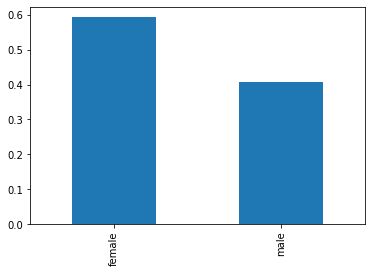

In [ ]:
dataframe["gender"] = dataframe["path"].apply(get_gender)
print(dataframe["gender"].value_counts(normalize= True))
dataframe["gender"].value_counts(normalize= True).plot(kind = "bar")

1. 60% of images are female.
2. All the images have size at least of 81 pixels.

Let's resize them to 100.

# Resizing images

In [24]:
def resize_image(path_to_resize):

    # Reads image
    image = cv2.imread(path_to_resize)

    # Converts it to gray scale
    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize to 100 x 100
    size = gray_scale.shape[0]

    if (size >= 100):
        gray_scale_resized = cv2.resize(gray_scale, (100,100), cv2.INTER_AREA) # Shrinks
    else:
        gray_scale_resized = cv2.resize(gray_scale, (100,100), cv2.INTER_CUBIC) # ENlarges

    # Flattens image
    return gray_scale_resized.flatten()

In [26]:
len(resize_image(path[0]))

10000

In [30]:
new_dataframe['gender'] = new_dataframe['path'].apply(get_gender)
new_dataframe.head()

/tmp/ipykernel_11811/3182143276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['gender'] = new_dataframe['path'].apply(get_gender)


,path,size,gender
0,./data/crop/female_crop/female_6653.png,122,female
1,./data/crop/female_crop/female_3869.png,182,female
2,./data/crop/female_crop/female_396.png,182,female
3,./data/crop/female_crop/female_4276.png,122,female
4,./data/crop/female_crop/female_5498.png,273,female


Structuring data

In [32]:
new_dataframe['structure_data'] = new_dataframe['path'].apply(resize_image)
new_dataframe.head()

/tmp/ipykernel_11811/3129995028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['structure_data'] = new_dataframe['path'].apply(resize_image)


,path,size,gender,structure_data
0,./data/crop/female_crop/female_6653.png,122,female,"[52, 55, 54, 49, 46, 52, 53, 48, 46, 45, 49, 4..."
1,./data/crop/female_crop/female_3869.png,182,female,"[108, 106, 103, 102, 102, 104, 100, 98, 101, 9..."
2,./data/crop/female_crop/female_396.png,182,female,"[207, 208, 207, 208, 209, 200, 172, 132, 26, 3..."
3,./data/crop/female_crop/female_4276.png,122,female,"[94, 138, 204, 231, 221, 216, 165, 121, 154, 1..."
4,./data/crop/female_crop/female_5498.png,273,female,"[223, 229, 216, 227, 180, 44, 20, 17, 18, 25, ..."


Copies and expand the columns

In [34]:
dataframe1 = new_dataframe['structure_data'].apply(pd.Series)
dataframe1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,52,55,54,49,46,52,53,48,46,45,...,51,48,45,41,49,53,43,38,42,84
1,108,106,103,102,102,104,100,98,101,94,...,20,22,35,44,41,29,24,13,16,27
2,207,208,207,208,209,200,172,132,26,31,...,32,86,93,78,112,88,72,52,43,56
3,94,138,204,231,221,216,165,121,154,184,...,247,244,240,233,222,209,197,187,180,175
4,223,229,216,227,180,44,20,17,18,25,...,71,50,22,11,14,26,30,38,33,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054,153,150,156,156,164,179,188,185,175,181,...,177,186,186,182,176,175,163,149,156,177
6055,116,109,103,109,88,76,81,126,113,108,...,54,54,56,56,55,55,53,57,51,48
6056,203,212,207,47,25,17,25,18,21,27,...,55,41,54,52,70,75,91,99,110,155
6057,33,29,24,21,23,34,50,59,61,60,...,32,29,27,26,26,27,27,27,27,28


In [42]:
dataframe2 = pd.concat((new_dataframe['gender'], dataframe1), axis=1)
dataframe2

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,52,55,54,49,46,52,53,48,46,...,51,48,45,41,49,53,43,38,42,84
1,female,108,106,103,102,102,104,100,98,101,...,20,22,35,44,41,29,24,13,16,27
2,female,207,208,207,208,209,200,172,132,26,...,32,86,93,78,112,88,72,52,43,56
3,female,94,138,204,231,221,216,165,121,154,...,247,244,240,233,222,209,197,187,180,175
4,female,223,229,216,227,180,44,20,17,18,...,71,50,22,11,14,26,30,38,33,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054,male,153,150,156,156,164,179,188,185,175,...,177,186,186,182,176,175,163,149,156,177
6055,male,116,109,103,109,88,76,81,126,113,...,54,54,56,56,55,55,53,57,51,48
6056,male,203,212,207,47,25,17,25,18,21,...,55,41,54,52,70,75,91,99,110,155
6057,male,33,29,24,21,23,34,50,59,61,...,32,29,27,26,26,27,27,27,27,28


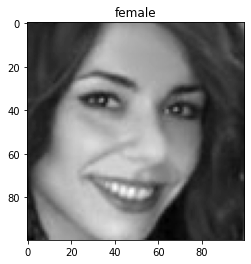

In [56]:
plt.imshow(dataframe2.loc[0][1:].values.reshape(100,100).astype('int'), cmap= 'gray')
plt.title(dataframe2.loc[0]['gender'])
plt.show()

In [ ]:
import pickle
pickle.dump(dataframe2, open("./data/dataframe_images_100x100.pickle", "wb"))